In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install scikit-learn

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd

air_crashes_data = pd.read_csv('aircrashes.csv')

air_crashes_data.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Sum of Ground,Sum of Fatalities (air),Sum of Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France?,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,August,6,British,Curtiss,Curtiss seaplane?,Victoria British,Canada Columbia Private,0,1,1
4,1913,Qtr 3,September,9,NaN,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20


In [ ]:
dataset_shape = air_crashes_data.shape
dataset_shape

(5030, 12)

In [ ]:
missing_values = air_crashes_data.isnull().sum()
missing_values_percentage = (air_crashes_data.isnull().sum() / len(air_crashes_data)) * 100

missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage %": missing_values_percentage})
missing_data.sort_values(by='Percentage %', ascending=False)

,Missing Values,Percentage %
Operator,234,4.652087
Country/Region,230,4.572565
Year,0,0.000000
Quarter,0,0.000000
Day,0,0.000000
Month,0,0.000000
Aircraft,0,0.000000
Aircraft Manufacturer,0,0.000000
Location,0,0.000000
Sum of Ground,0,0.000000


In [ ]:
summary_statistics = air_crashes_data.describe()
summary_statistics

,Year,Day,Sum of Ground,Sum of Fatalities (air),Sum of Aboard
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,1970.938370,15.783499,1.706163,22.237972,31.013519
std,24.770415,8.795157,55.132476,34.960979,45.399504
min,1908.000000,1.000000,0.000000,0.000000,0.000000
25%,1951.000000,8.000000,0.000000,4.000000,7.000000
50%,1970.000000,16.000000,0.000000,11.000000,16.000000
75%,1992.000000,23.000000,0.000000,25.000000,34.000000
max,2023.000000,31.000000,2750.000000,583.000000,644.000000


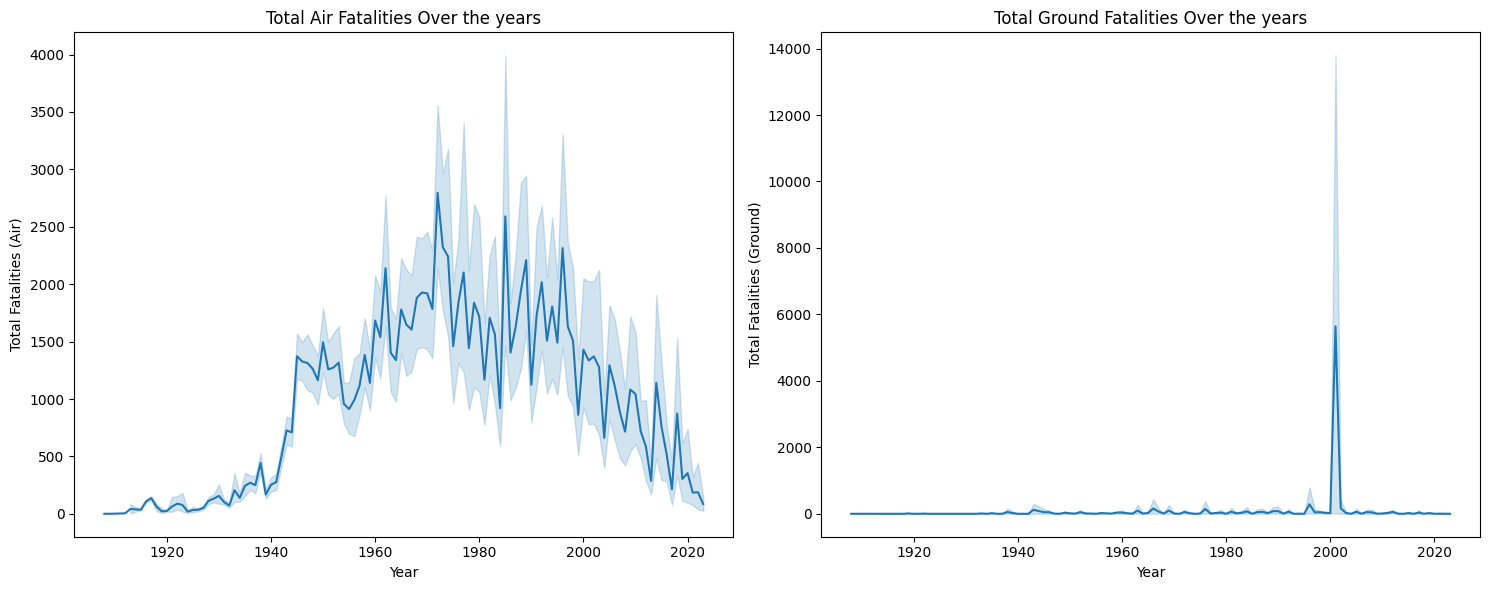

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=air_crashes_data, x='Year', y='Sum of Fatalities (air)', estimator="sum")
plt.title('Total Air Fatalities Over the years')
plt.ylabel('Total Fatalities (Air)')

plt.subplot(1, 2, 2)
sns.lineplot(data=air_crashes_data, x='Year', y='Sum of Ground', estimator="sum")
plt.title('Total Ground Fatalities Over the years')
plt.ylabel('Total Fatalities (Ground)')

plt.tight_layout()
plt.show()

In [ ]:
air_crashes_data["Operator"].fillna(air_crashes_data["Operator"].mode()[0], inplace=True)
air_crashes_data["Country/Region"].fillna(air_crashes_data["Country/Region"].mode()[0], inplace=True)

missing_values_after = air_crashes_data.isnull().sum()
missing_values_after

<ipython-input-12-da1cd7740f69>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_crashes_data["Operator"].fillna(air_crashes_data["Operator"].mode()[0], inplace=True)
<ipython-input-12-da1cd7740f69>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

,0
Year,0
Quarter,0
Month,0
Day,0
Country/Region,0
Aircraft Manufacturer,0
Aircraft,0
Location,0
Operator,0
Sum of Ground,0


In [ ]:
air_crashes_data["Total Fatalities"] = air_crashes_data["Sum of Fatalities (air)"] + air_crashes_data["Sum of Ground"]
air_crashes_data["Survivors"] = air_crashes_data["Sum of Aboard"] - air_crashes_data["Sum of Fatalities (air)"]

air_crashes_data[["Total Fatalities", "Survivors"]].head()

,Total Fatalities,Survivors
0,1,1
1,1,0
2,5,0
3,1,0
4,14,6


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_encoded = pd.get_dummies(X, drop_first=True)

X = air_crashes_data.drop("Total Fatalities", axis=1)
y = air_crashes_data["Total Fatalities"]

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4024, 11481), (1006, 11481))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

mse,r2

(2.2432098239809534e-10, 0.9999999999999749)